# Imports

In [80]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colors

import pandas as pd

import numpy as np

from scipy.stats import kurtosis


# Disable warnings
import warnings
warnings.filterwarnings("ignore")

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)

plt.cm.register_cmap(cmap=cmap)

pd.set_option('display.width', 1000)

# Load Data

In [81]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Exploratory Data Analysis

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [83]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [84]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


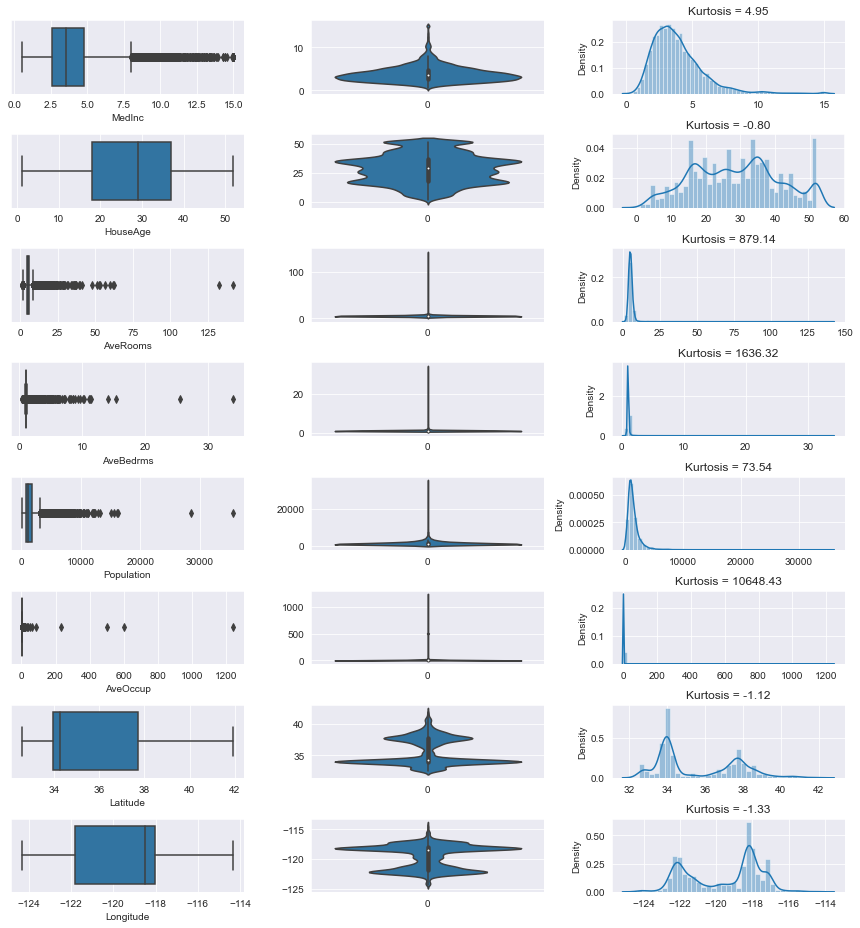

In [85]:
columns = X.columns

fig, ax =plt.subplots(len(columns), 3, figsize= (12,13))
counterX = 0
for col in columns:
    sns.boxplot(x=X[col], ax=ax[counterX, 0])
    sns.violinplot(data=X[col], ax=ax[counterX, 1])
    sns.distplot(x=X[col], ax=ax[counterX, 2]).set(title="Kurtosis = {kurtosis:.2f}".format(kurtosis = kurtosis(X[col])))
    counterX += 1

plt.tight_layout()
plt.show()
del columns, counterX, col, fig, ax

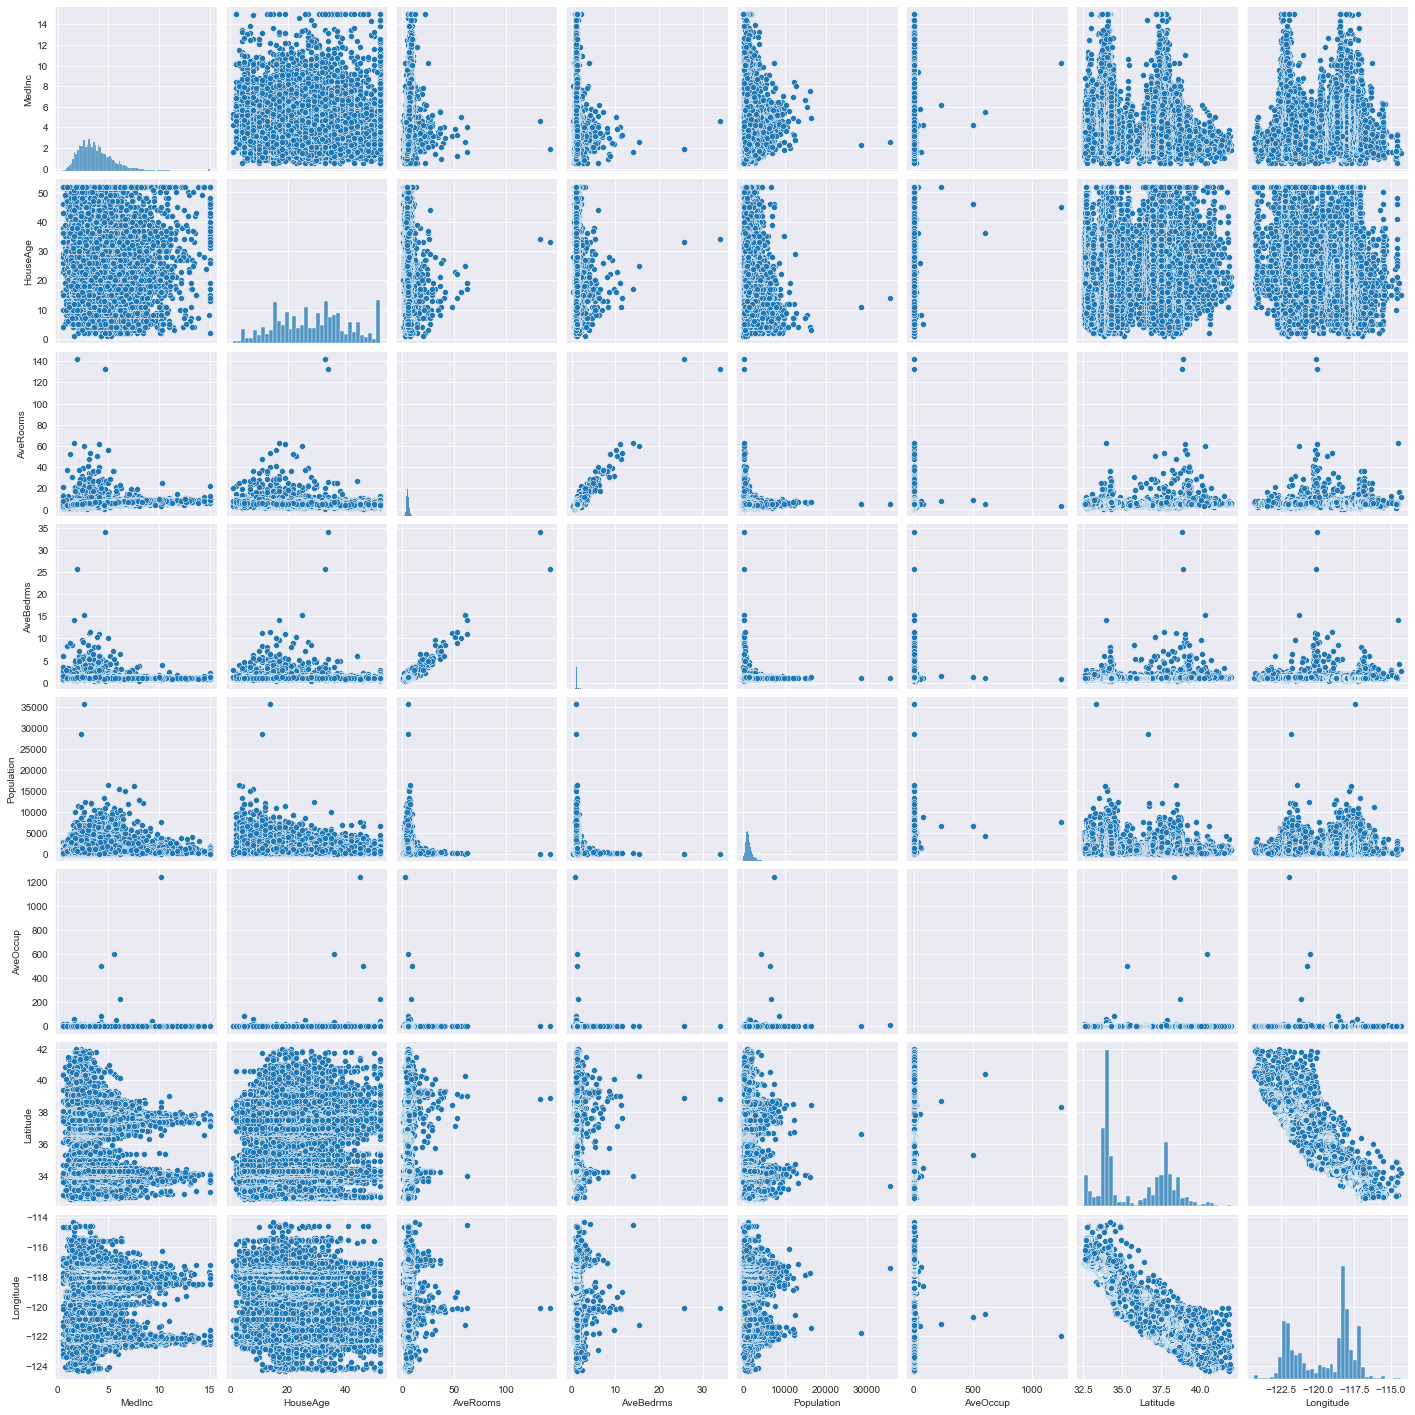

In [86]:
sns.pairplot(X)

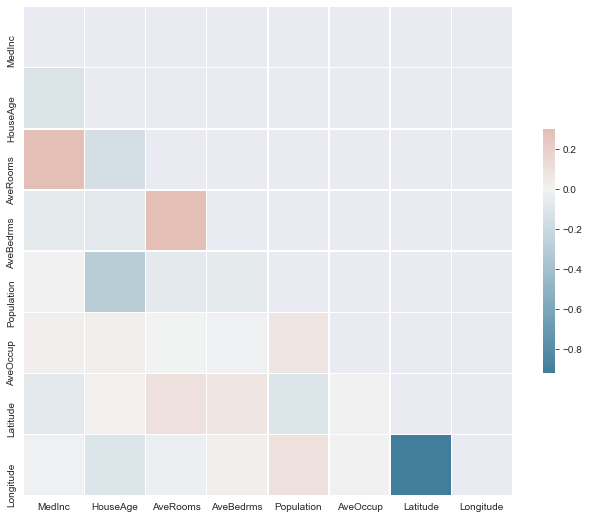

In [87]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

del corr, mask, f, ax, cmap

In [88]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [89]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

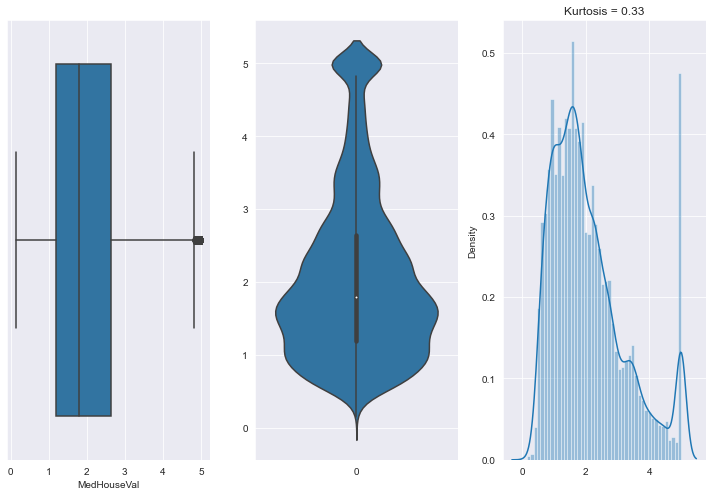

In [90]:
fig, ax =plt.subplots(1, 3, figsize= (10,7))
sns.boxplot(x=y, ax=ax[0])
sns.violinplot(data=y, ax=ax[1])
sns.distplot(x=y, ax=ax[2]).set(title="Kurtosis = {kurtosis:.2f}".format(kurtosis = kurtosis(y)))

plt.tight_layout()
plt.show()
del fig, ax

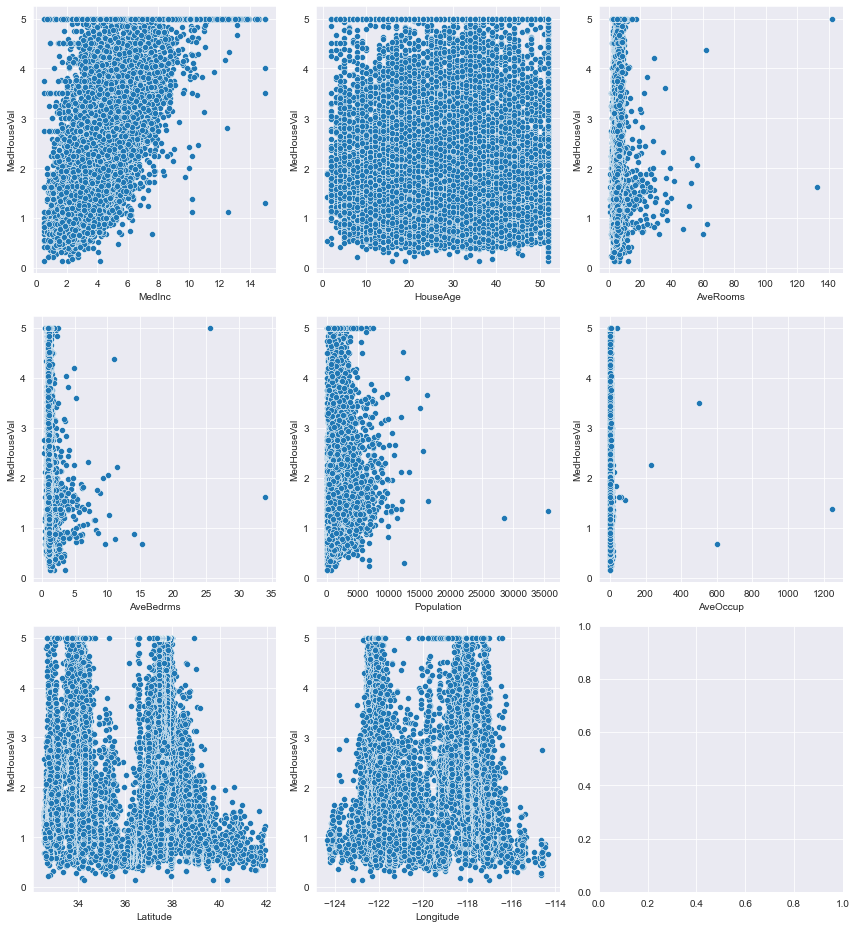

In [91]:
columns = X.columns
fig, ax =plt.subplots(1+len(columns)//3, 3, figsize= (12,13))
counterX = 0
for col in columns:
    sns.scatterplot(x=X[col], y=y, ax=ax[counterX//3, counterX%3])
    counterX += 1

plt.tight_layout()
plt.show()
del columns, col, fig, ax

# Feature Importance

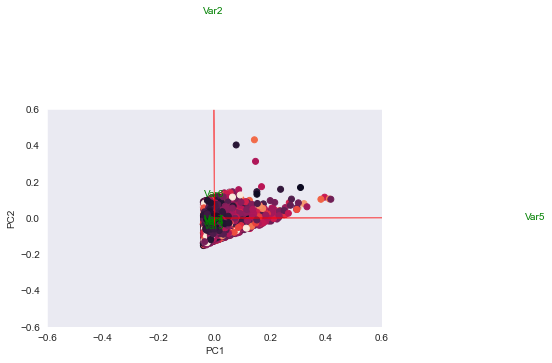

,PCA,feature
0,9.997893e-01,MedInc
1,1.132811e-04,HouseAge
2,8.328346e-05,AveRooms
3,6.443046e-06,AveBedrms
4,5.128711e-06,Population
5,2.318330e-06,AveOccup
6,1.948397e-07,Latitude
7,2.372226e-08,Longitude


In [92]:
pca = PCA()
x_new = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
df_pca = pd.DataFrame(pca.explained_variance_ratio_, columns=["PCA"])
df_pca["feature"]= X.columns
df_pca

In [93]:
# tree importance here
dtr5 = DecisionTreeRegressor(max_depth=5)
dtr5.fit(X, y)

dtr10 = DecisionTreeRegressor(max_depth=10)
dtr10.fit(X, y)

dtr20 = DecisionTreeRegressor(max_depth=20)
dtr20.fit(X, y)

importances = {
    "5" : dtr5.feature_importances_,
    "10" : dtr10.feature_importances_,
    "20" : dtr20.feature_importances_
}

featureImportances = {}

for k in importances:
    featureImportance = {}
    importance = importances[k]
    for i, col in enumerate(X.columns):
        featureImportance[col] = importance[i]
    featureImportances[k] = featureImportance

print("depth of 5")
print(pd.DataFrame(featureImportances["5"], index=[0]))
print()
print("depth of 10")
print(pd.DataFrame(featureImportances["10"], index=[0]))
print()
print("depth of 20")
print(pd.DataFrame(featureImportances["20"], index=[0]))

depth of 5
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  0.77224   0.04307  0.031606        0.0    0.003709  0.130096  0.018526   0.000752

depth of 10
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  0.615173  0.046027  0.036632   0.011582     0.01758  0.133507  0.073761   0.065738

depth of 20
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  0.52777  0.050453  0.052952   0.025674     0.03203  0.131543  0.094257   0.085321


# Feature Engineering

In [94]:
X["AveNonBedrms"] = X.AveRooms - X.AveBedrms

In [95]:
X["AveOccPerBedrms"] = X.AveOccup / X.AveBedrms

In [96]:
X["HousesInArea"] = X.Population / X.AveOccup

In [97]:
X["IncomeInArea"] = X.MedInc * X.Population
X["IncomePerHouse"] = X.MedInc * X.AveOccup

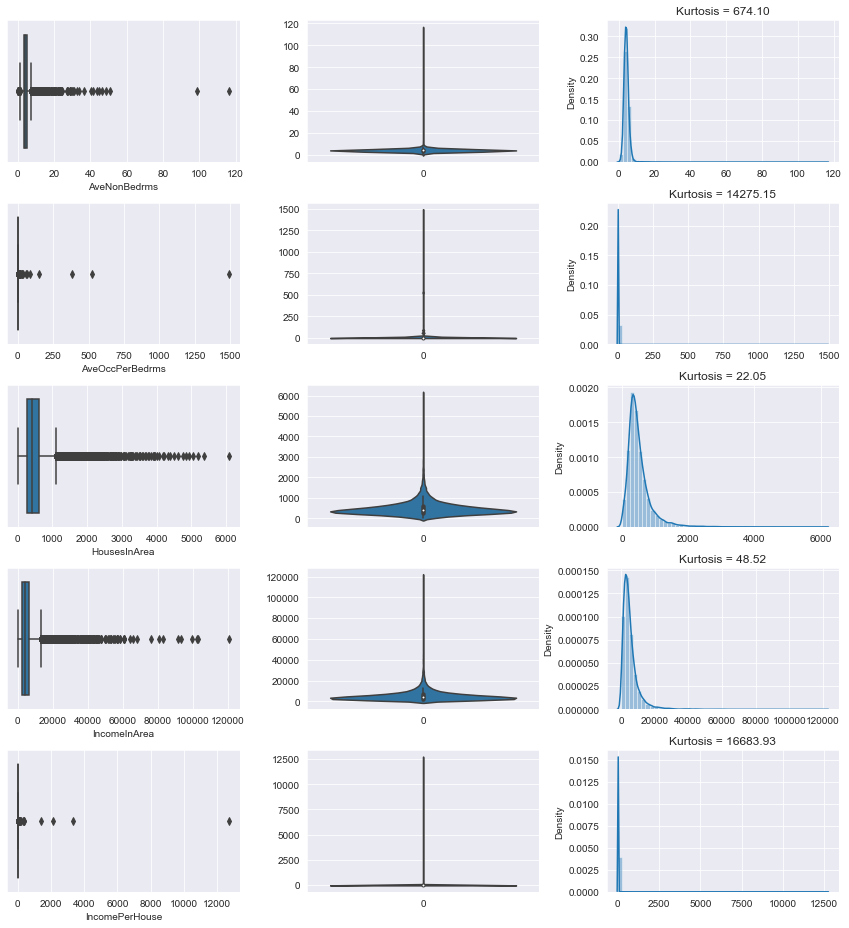

In [98]:
columns = X[["AveNonBedrms", "AveOccPerBedrms", "HousesInArea", "IncomeInArea", "IncomePerHouse"]].columns

fig, ax =plt.subplots(len(columns), 3, figsize= (12,13))
counterX = 0
for col in columns:
    sns.boxplot(x=X[col], ax=ax[counterX, 0])
    sns.violinplot(data=X[col], ax=ax[counterX, 1])
    sns.distplot(x=X[col], ax=ax[counterX, 2]).set(title="Kurtosis = {kurtosis:.2f}".format(kurtosis = kurtosis(X[col])))
    counterX += 1

plt.tight_layout()
plt.show()
del columns, counterX, col, fig, ax

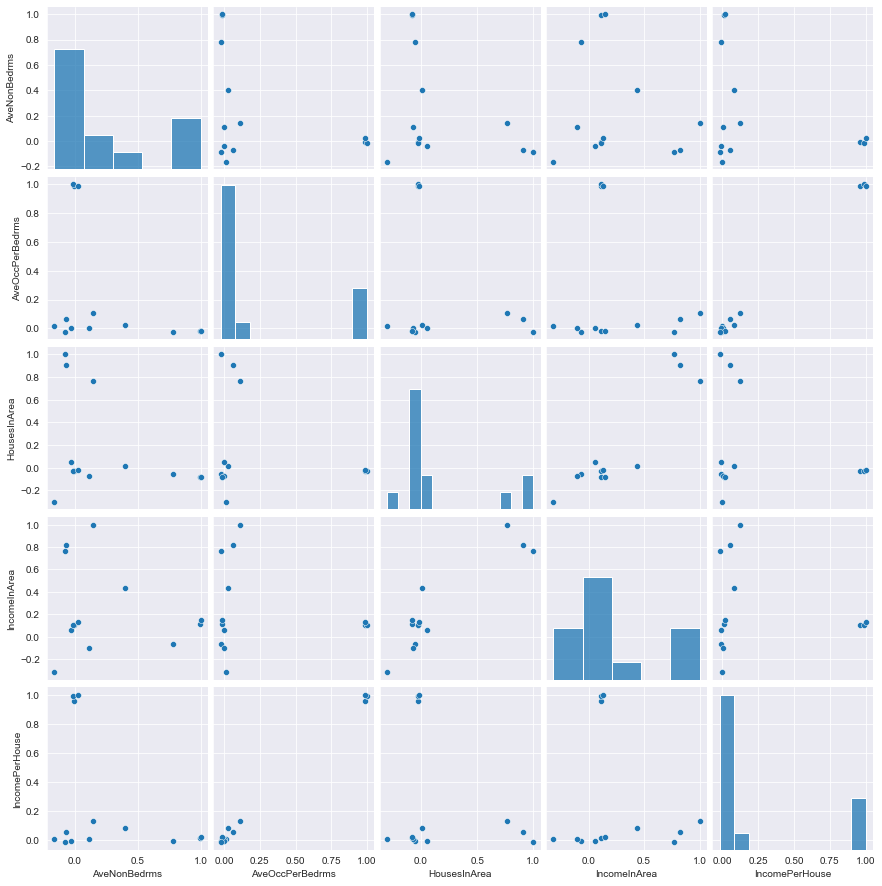

In [99]:
Xcorr = X.corr()[["AveNonBedrms", "AveOccPerBedrms", "HousesInArea", "IncomeInArea", "IncomePerHouse"]]
sns.pairplot(Xcorr)
del Xcorr

# Power Transformation

In [100]:
pt = PowerTransformer()
cols = X.columns
XTransformed = pd.DataFrame(MinMaxScaler().fit_transform(pd.DataFrame(data = pt.fit_transform(X), columns=cols)), columns=X.columns)

In [101]:
XTransformed.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveNonBedrms,AveOccPerBedrms,HousesInArea,IncomeInArea,IncomePerHouse
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.522716,0.586284,0.533867,0.850604,0.378034,0.518865,0.465935,0.413482,0.454426,0.378424,0.447366,0.462108,0.335537
std,0.151688,0.234937,0.069193,0.035137,0.083480,0.080596,0.256579,0.190469,0.062713,0.055950,0.101600,0.097814,0.067854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420946,0.393554,0.494850,0.833870,0.330455,0.472198,0.266733,0.202279,0.419152,0.349758,0.390046,0.403941,0.291842
50%,0.525900,0.603265,0.538455,0.848556,0.375230,0.521082,0.320625,0.509972,0.458436,0.380868,0.443178,0.461058,0.337042
75%,0.623996,0.746285,0.575679,0.863993,0.424132,0.568388,0.730706,0.561254,0.492053,0.410363,0.503407,0.518908,0.382003
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Revisualize

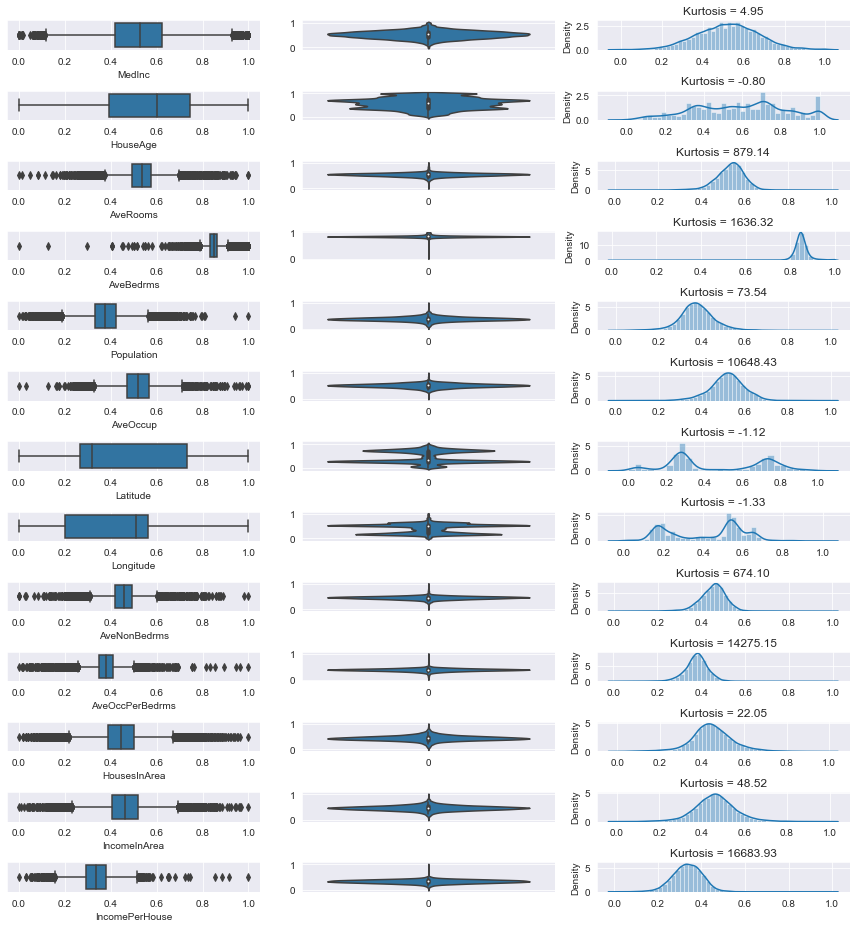

In [102]:
columns = XTransformed.columns
fig, ax = plt.subplots(len(columns), 3, figsize=(12, 13))
counterX = 0
for col in columns:
    sns.boxplot(x=XTransformed[col], ax=ax[counterX, 0])
    sns.violinplot(data=XTransformed[col], ax=ax[counterX, 1])
    sns.distplot(x=XTransformed[col], ax=ax[counterX, 2]).set(title="Kurtosis = {kurtosis:.2f}".format(kurtosis=kurtosis(X[col])))
    counterX += 1

plt.tight_layout()
plt.show()
del columns, counterX, col, fig, ax

# Feature Importance

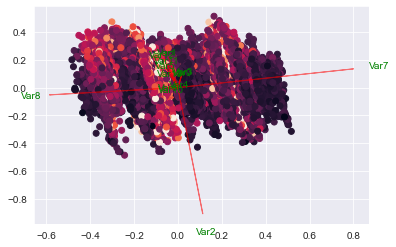

,PCA,feature
0,0.434367,MedInc
1,0.261448,HouseAge
2,0.135206,AveRooms
3,0.086215,AveBedrms
4,0.045608,Population
5,0.023725,AveOccup
6,0.008431,Latitude
7,0.004089,Longitude
8,0.000426,AveNonBedrms
9,0.000265,AveOccPerBedrms


In [103]:
pca = PCA()
x_new = pca.fit_transform(XTransformed)

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
df_pca = pd.DataFrame(pca.explained_variance_ratio_, columns=["PCA"])
df_pca["feature"]= X.columns
df_pca

In [104]:
# tree importance here
dtr5 = DecisionTreeRegressor(max_depth=5)
dtr5.fit(XTransformed, y)

dtr10 = DecisionTreeRegressor(max_depth=10)
dtr10.fit(XTransformed, y)

dtr20 = DecisionTreeRegressor(max_depth=20)
dtr20.fit(XTransformed, y)

importances = {
    "5" : dtr5.feature_importances_,
    "10" : dtr10.feature_importances_,
    "20" : dtr20.feature_importances_
}

featureImportances = {}

for k in importances:
    featureImportance = {}
    importance = importances[k]
    for i, col in enumerate(X.columns):
        featureImportance[col] = importance[i]
    featureImportances[k] = featureImportance

print("depth of 5")
print(pd.DataFrame(featureImportances["5"], index=[0]))
print()
print("depth of 10")
print(pd.DataFrame(featureImportances["10"], index=[0]))
print()
print("depth of 20")
print(pd.DataFrame(featureImportances["20"], index=[0]))

depth of 5
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  AveNonBedrms  AveOccPerBedrms  HousesInArea  IncomeInArea  IncomePerHouse
0  0.766963  0.041789       0.0        0.0         0.0  0.126301  0.024731        0.0      0.023669         0.011998      0.004549           0.0             0.0

depth of 10
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  AveNonBedrms  AveOccPerBedrms  HousesInArea  IncomeInArea  IncomePerHouse
0  0.607558  0.045315  0.003729   0.005564    0.005295  0.109747  0.072861   0.065272      0.031698         0.035989      0.008767      0.004574        0.003631

depth of 20
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  AveNonBedrms  AveOccPerBedrms  HousesInArea  IncomeInArea  IncomePerHouse
0  0.519993  0.047909  0.013741   0.016943    0.013088  0.104944  0.088282   0.073881      0.037061         0.043848      0.014022      0.011899        0.0143

# Clustering

# Prediction